In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    print "Can't import Seaborn"
import numpy as np
import pandas as pd
from ase.io.gaussian import read_gaussian_out

In [2]:
ga_directory = "/gss_gpfs_scratch/harms.n/conformers/"
benchmark_directory = "/gss_gpfs_scratch/harms.n/conformers/database_optimizations/"

In [3]:
import os

In [4]:
b = []

if os.path.exists("benchmarks.csv"):
    benchmarks = pd.read_csv("benchmarks.csv")
    
else:
    for f in os.listdir(benchmark_directory):
        if f.endswith(".log"): 
            try:
                a = read_gaussian_out(os.path.join(benchmark_directory, f))
                pe = a.get_potential_energy()
                aa = f[:3]
                num = f.split(".")[-2]
                b.append([aa, int(num), pe])
            except IndexError:
                print "We had an error with {}".format(f)
    benchmarks = np.array(b)
    benchmarks = pd.DataFrame(b, columns=["aa", "num", "pe"])
    benchmarks = benchmarks.sort_values("aa")
benchmarks

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,aa,num,pe
0,0,0,0,0,ala,6,-8809.191751
1,1,1,1,149,ala,11,-8809.024842
2,2,2,2,147,ala,8,-8809.146055
3,3,3,3,36,ala,9,-8809.168942
4,4,4,4,139,ala,13,-8808.971363
5,5,5,5,174,ala,5,-8809.194562
6,6,6,6,29,ala,14,-8808.932331
7,7,7,7,52,ala,10,-8809.001383
8,8,8,8,24,ala,1,-8809.224998
9,9,9,9,115,ala,4,-8809.197808


In [5]:
ga_directory
b = []
if os.path.exists("results.csv"):
    ga_results = pd.read_csv("results.csv")
else:
    for f in os.listdir(ga_directory):
        if f.endswith(".log") and not f.startswith("aa"): 
            try:
                a = read_gaussian_out(os.path.join(ga_directory, f))
                pe = a.get_potential_energy()
                if pe < 0:
                    aa, m, gen, num = f.split(".")[0].split("_")
                    b.append([aa.lower(), m, int(gen), int(num), pe])
            except IndexError:
                pass
                #print "We had an error with {}".format(f)
    ga_results = pd.DataFrame(b, columns=["aa", "method", "attempt", "num", "pe"])
    ga_results = ga_results.sort_values("aa")
ga_results


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,aa,method,attempt,num,pe
0,0,0,0,1365,ala,ga,16,3,-8808.976302
1,1,1,1,1051,ala,ga,16,5,-8809.227420
2,2,2,2,1477,ala,es,34,8,-8809.187269
3,3,3,3,1668,ala,es,17,7,-8809.029952
4,4,4,4,1049,ala,ga,0,4,-8809.183168
5,5,5,5,1478,ala,es,13,2,-8809.029952
6,6,6,6,540,ala,ga,23,12,-8808.949540
7,7,7,7,1046,ala,ga,0,13,-8808.828335
8,8,8,8,543,ala,ga,11,24,-8809.248968
9,9,9,9,1045,ala,es,46,0,-8809.025596


In [6]:
smiles_dict = {
    "Phe" : "NC(CC1=CC=CC=C1)C(=O)O",
    "Gly" : "NCCC(=O)O",
    "Ala" : "NC(C)C(=O)O",
    "Ile" : "NC(C(C)CC)C(=O)O",
    "Leu" : "NC(CC(C)C)C(=O)O",
    "Val" : "NC(C(C)C)C(=O)O",
    "Trp" : "NC(CC1=CNC2=C1(C=CC=C2))C(=O)O"
}

In [7]:
from ase import units


In [8]:
parity = []
average = []
for name in smiles_dict.iterkeys():
    name = name.lower()
    #print name
    if name in ga_results.aa.unique():
        i = 0
        for num in ga_results[ga_results.aa == name].num.unique():
            master_min = benchmarks[benchmarks.aa == name].min().pe
            ga_min = ga_results[(ga_results.method == "ga") & (ga_results.num == num) & (ga_results.aa == name) & (ga_results.pe < -1) & (ga_results.pe > master_min-100)].min().pe
            
            master_average = benchmarks[benchmarks.aa == name].mean().pe
            ga_average = ga_results[(ga_results.num == num) & (ga_results.aa == name) & (ga_results.pe < -1) & (ga_results.pe > master_min-100)].mean().pe
            
            if not np.isnan(ga_min):
                #print ga_min

                i +=1
                parity.append([name, "ga", -1. * float(master_min) * (((units.kcal) / (units.mol)) / (units.eV)), 
                               -1 * float(ga_min) * (((units.kcal) / (units.mol)) / (units.eV))])

                average.append([name, "ga", -1. * float(master_average) * (((units.kcal) / (units.mol)) / (units.eV)), 
                               -1 * float(ga_average) * (((units.kcal) / (units.mol)) / (units.eV))])
            if i > 9:
                print "We have 10 results for {}".format(name)
                break
parity = pd.DataFrame(parity, columns=["aa", "type", "master", "calculated"])
average = pd.DataFrame(average, columns=["aa", "type", "master", "calculated"])
parity
    

We have 10 results for ile
We have 10 results for val
We have 10 results for ala
We have 10 results for gly
We have 10 results for leu
We have 10 results for trp


,aa,type,master,calculated
0,ile,ga,521.148756,521.148817
1,ile,ga,521.148756,521.144963
2,ile,ga,521.148756,521.146986
3,ile,ga,521.148756,521.143898
4,ile,ga,521.148756,521.139701
5,ile,ga,521.148756,521.148685
6,ile,ga,521.148756,521.147171
7,ile,ga,521.148756,521.146732
8,ile,ga,521.148756,521.145971
9,ile,ga,521.148756,521.147506


In [9]:
ga_results[ga_results.method == "es"]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,aa,method,attempt,num,pe
2,2,2,2,1477,ala,es,34,8,-8809.187269
3,3,3,3,1668,ala,es,17,7,-8809.029952
5,5,5,5,1478,ala,es,13,2,-8809.029952
9,9,9,9,1045,ala,es,46,0,-8809.025596
14,14,14,14,1663,ala,es,47,5,-8809.184330
15,15,15,15,552,ala,es,2,0,-8809.145190
19,19,19,19,1661,ala,es,32,0,-8809.175035
21,21,21,21,1054,ala,es,14,5,-8809.192494
22,22,22,22,1474,ala,es,41,5,-8809.145785
27,27,27,27,1466,ala,es,49,4,-8809.185846


In [10]:
es_parity = []
es_average = []
for name in smiles_dict.iterkeys():
    name = name.lower()
    print name
    if name in ga_results.aa.unique():
        i = 0
        for num in ga_results[ga_results.aa == name].num.unique():
            master_min = benchmarks[benchmarks.aa == name].min().pe
            ga_min = ga_results[(ga_results.method == "es") & (ga_results.num == num) & (ga_results.aa == name) & (ga_results.pe < -1) & (ga_results.pe > master_min-100)].min().pe
            
            
            master_average = benchmarks[benchmarks.aa == name].mean().pe
            ga_average = ga_results[(ga_results.num == num) & (ga_results.aa == name) & (ga_results.pe < -1) & (ga_results.pe > master_min-100)].mean().pe
            if not np.isnan(ga_min):
                print ga_min
                i += 1
                es_parity.append([name, "es", -1. * float(master_min) * (((units.kcal) / (units.mol)) / (units.eV)), 
                               -1 * float(ga_min) * (((units.kcal) / (units.mol)) / (units.eV))])
                es_average.append([name, "es", -1. * float(master_average) * (((units.kcal) / (units.mol)) / (units.eV)), 
                               -1 * float(ga_average) * (((units.kcal) / (units.mol)) / (units.eV))])
            if i > 9:
                print "We have 10"
                break
es_parity = pd.DataFrame(es_parity, columns=["aa", "type", "master", "calculated"])
es_average = pd.DataFrame(es_average, columns=["aa", "type", "master", "calculated"])
es_parity
    

ile
-12017.9761001
-12017.9334653
-12017.9657544
-12017.9657299
-12017.9149643
-12017.8723431
-12017.9414192
-12017.9699885
-12017.9042185
-12017.9348232
We have 10
val
-10948.4061339
-10948.43811
-10948.4239764
-10948.1900863
-10948.3586963
-10948.2832989
-10948.4093366
-10948.4037338
-10948.3264399
-10948.4101611
We have 10
phe
-15095.7225614
-15095.7206321
-15095.7305316
-15095.4499278
-15095.726556
-15095.7343548
-15095.754064
-15095.442178
-15095.6330631
ala
-8809.24281585
-8809.25081872
-8809.25131669
-8809.25187452
-8809.25092213
-8809.25045681
-8809.21475819
-8809.24352063
-8809.02928267
-8809.25167588
We have 10
gly
-7739.60023328
-7739.38094488
-7739.52092569
-7739.40735625
-7739.55175619
-7739.60052444
-7739.54469756
-7739.5517181
-7739.54966908
-7739.52615844
We have 10
leu
-12017.9041233
-12017.6181969
-12017.8942864
-12017.8918156
-12017.7972805
-12017.8155475
-12017.9027981
-12017.743236
-12017.84508
-12017.9393158
We have 10
trp
-18675.9196409
-18675.9638186
-18675.8700

,aa,type,master,calculated
0,ile,es,521.148756,521.148764
1,ile,es,521.148756,521.146915
2,ile,es,521.148756,521.148316
3,ile,es,521.148756,521.148315
4,ile,es,521.148756,521.146113
5,ile,es,521.148756,521.144265
6,ile,es,521.148756,521.147260
7,ile,es,521.148756,521.148499
8,ile,es,521.148756,521.145647
9,ile,es,521.148756,521.146974


In [11]:
ga_results[(ga_results.aa == 'gly') & (ga_results.pe < -1) & (ga_results.pe > -10000)].min().pe

-7739.60070131

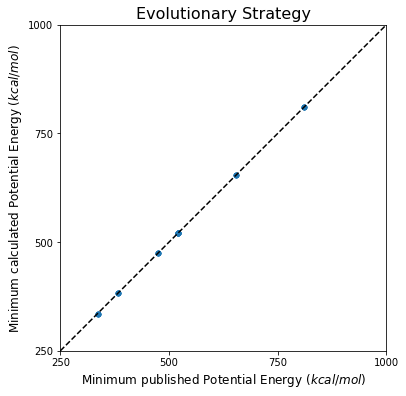

In [21]:
es_parity = es_parity.dropna()


ax = es_parity[es_parity.type == "es"].plot.scatter(x="master", y="calculated", figsize=(6,6))

ax.set_ylim([7500, 20000])
ax.set_xlim([7500, 20000])
ax.axis("square")
ax.plot([250, 1000],[250, 1000], "k--" ,)
ax.set_title("Evolutionary Strategy", fontdict={"size":16})

ax.set_xlim([250, 1000])
ax.set_ylim([250, 1000])
ax.set_xticks([250, 500,750, 1000])
ax.set_yticks([250, 500,750, 1000])
ax.set_ylabel("Minimum calculated Potential Energy ($kcal/mol$)", fontdict={"size":12})
ax.set_xlabel("Minimum published Potential Energy ($kcal/mol$)", fontdict={"size":12})
fig = ax.get_figure()
fig.savefig("aa_es.pdf")


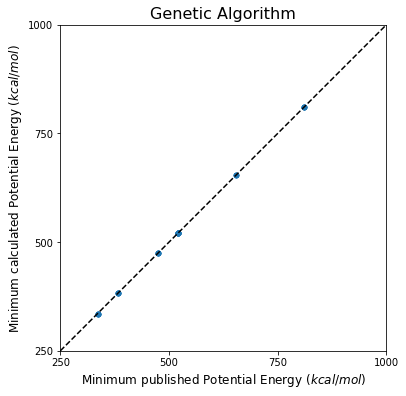

In [20]:

ax = parity[parity.type == "ga"].plot.scatter(x="master", y="calculated", figsize=(6,6))

ax.set_ylim([7500, 20000])
ax.set_xlim([7500, 20000])
ax.axis("square")
ax.plot([250, 1000],[250, 1000], "k--" ,)
ax.set_title("Genetic Algorithm", fontdict={"size":16})

ax.set_xlim([250, 1000])
ax.set_ylim([250, 1000])
ax.set_xticks([250, 500,750, 1000])
ax.set_yticks([250, 500,750, 1000])
ax.set_ylabel("Minimum calculated Potential Energy ($kcal/mol$)", fontdict={"size":12})
ax.set_xlabel("Minimum published Potential Energy ($kcal/mol$)", fontdict={"size":12})
fig = ax.get_figure()
fig.savefig("aa_ga.pdf")


In [14]:
ga_results.aa.unique()

array(['ala', 'gly', 'ile', 'leu', 'phe', 'trp', 'val'], dtype=object)

0 Gly
1 Ala
2 Val
3 Leu
4 Ile
5 Phe
6 Trp


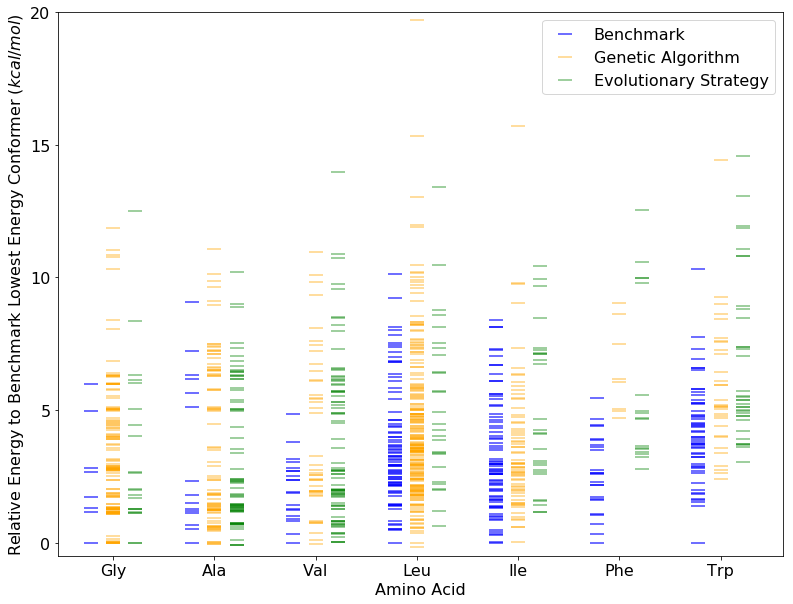

In [22]:
name = "gly"
i = 1
names =['Gly', 'Ala', 'Val', 'Leu', 'Ile', "Phe", "Trp"]

plt.figure(figsize=(13,10))
for i,name in enumerate(names):
    print i, name
    name =name.lower()
    bench = benchmarks[benchmarks.aa == name]
    min_value = bench.pe.min()
    bench_confs = bench.pe - min_value

    ga = ga_results[(ga_results.aa == name) & (ga_results.method == "ga")]
    for numb, j in enumerate(np.unique(ga.attempt.values)):
        if numb > 9:
            break

        ga = ga_results[(ga_results.aa == name) & (ga_results.method == "ga")]
        ga_first = ga[ga.attempt == j]
        ga_confs = ga_first.pe - min_value
        min_ga_conf = ga_confs.min()
        s = ga_confs.shape[0]
        a = plt.scatter(x = np.zeros_like(ga_confs.values) + i ,y = ga_confs.values *23, marker="_", s=200, c="orange", alpha=0.5)

    es = ga_results[(ga_results.aa == name) & (ga_results.method == "es")]
    for numb, j in enumerate(np.unique(es.attempt.values)):
        if numb > 9:
            break

        es = ga_results[(ga_results.aa == name) & (ga_results.method == "es")]
        es_first = es[es.attempt == j]
        es_confs = es_first.pe - min_value
        b=plt.scatter(x = np.zeros_like(es_confs.values) + i + 0.22,y = es_confs.values *23, marker="_", s=200, c="green", alpha=0.5)




    c = plt.scatter(x = np.zeros_like(bench_confs.values) + i - 0.22,y = bench_confs.values *23, marker="_", s=200, c="blue", alpha = 0.75)
    #plt.scatter(x = np.zeros_like(ga_confs.values) + i ,y = ga_confs.values, marker="_", s=150, c="orange")
    #plt.scatter(x = np.zeros_like(es_confs.values) + i + 0.25,y = es_confs.values, marker="_", s=150, c="green")
    plt.ylim([-0.5,20])
plt.xticks([0,1,2,3,4,5,6], names,fontsize=16)
plt.yticks([0,5,10,15,20],fontsize=16)
plt.legend([c,a,b],["Benchmark","Genetic Algorithm","Evolutionary Strategy"], fontsize=16)
plt.ylabel("Relative Energy to Benchmark Lowest Energy Conformer $(kcal/mol)$", fontdict={"size":16})

plt.xlabel("Amino Acid", fontdict={"size":16})
plt.savefig("pcr.pdf")


In [16]:
ga_results.to_csv("results.csv")
benchmarks.to_csv("benchmarks.csv")